In [111]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [112]:
import os
import numpy as np
from PIL import Image

def load_images_from_folder(folder_path, label, target_size=(300, 300)):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = Image.open(img_path).convert("RGB")
            img = img.resize(target_size)
            images.append(np.array(img))
            labels.append(label)
    return images, labels

def load_dataset(base_dir, target_size=(300, 300)):
    horses_dir = os.path.join(base_dir, "horses")
    humans_dir = os.path.join(base_dir, "humans")

    horses_imgs, horses_labels = load_images_from_folder(horses_dir, label=0, target_size=target_size)
    humans_imgs, humans_labels = load_images_from_folder(humans_dir, label=1, target_size=target_size)

    X = np.array(horses_imgs + humans_imgs, dtype=np.uint8)
    y = np.array(horses_labels + humans_labels, dtype=np.uint8)

    # Shuffle
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    return X, y

# Paths
train_dir = "horse-or-human/train"
test_dir = "horse-or-human/validation"

# Load train & test sets
X_train, y_train = load_dataset(train_dir)
X_test, y_test = load_dataset(test_dir)

In [113]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [114]:
X_train.shape

(1027, 300, 300, 3)

In [115]:
import matplotlib.pyplot as plt
import random

def show_image(idx=0):
    plt.imshow(X_train[idx]) 
    plt.title(f"Label: {y_train[idx]} | Index: {idx}")
    plt.axis('off')
    plt.show()

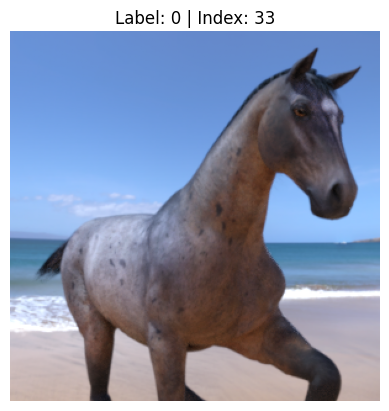

In [116]:
show_image(idx=random.randint(0, len(X_train) - 1))

In [117]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',),
    tf.keras.layers.MaxPool2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/Users/ansh/Downloads/development/machine_learning/ml_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [118]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [119]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [120]:
checkpoint_filepath = 'best_model.keras' # or 'best_model.h5' for HDF5 format
model_checkpoint_callback = ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_best_only=True,  # Only save the best model based on the monitored metric
        monitor='val_loss',   # Metric to monitor (e.g., 'val_loss', 'val_accuracy')
        mode='min',           # 'min' for metrics like loss, 'max' for metrics like accuracy
        verbose=1             # Set to 1 to see messages when a better model is saved
    )

In [121]:
model.fit(X_train, y_train, epochs=30, batch_size=64, callbacks=[model_checkpoint_callback], validation_data=(X_test, y_test))

Epoch 1/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.5343 - loss: 2.2939
Epoch 1: val_loss improved from inf to 1.03833, saving model to best_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 488ms/step - accuracy: 0.5339 - loss: 2.2566 - val_accuracy: 0.5000 - val_loss: 1.0383
Epoch 2/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.6454 - loss: 0.6296
Epoch 2: val_loss did not improve from 1.03833
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 440ms/step - accuracy: 0.6507 - loss: 0.6261 - val_accuracy: 0.5000 - val_loss: 1.2332
Epoch 3/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step - accuracy: 0.7240 - loss: 0.5805
Epoch 3: val_loss improved from 1.03833 to 0.39536, saving model to best_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 455ms/step - accuracy: 0.7276 - loss: 0.5732 - val_accuracy: 0.8633 - val_loss: 0.3954
Epoch 4/30
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step - accuracy: 0.8892 - loss: 0.2710
Epoch 4: val_loss did not improve from 0.39536
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 464ms/step - ac

In [122]:
model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.7682 - loss: 3.9282


[3.47849702835083, 0.78515625]

In [123]:
best_model = tf.keras.models.load_model(checkpoint_filepath)

In [125]:
best_model.evaluate(X_train, y_train)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.8079 - loss: 0.4193


[0.4055604934692383, 0.8091529011726379]

In [124]:
best_model.evaluate(X_test, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.8517 - loss: 0.4403


[0.3953569233417511, 0.86328125]